In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

### Task_1 dimensionality reduction

In [75]:
from sklearn.decomposition import PCA
import pandas as pd

weather_df = pd.read_csv("./data_lab2/weatherAUS.csv")
weather_df.dropna(subset=['RainTomorrow'], inplace=True)
weather_df.fillna(weather_df.mean(), inplace = True)
weather_df['RainToday'] = weather_df.RainToday.astype("category").cat.codes
weather_df['RainTomorrow'] = weather_df.RainTomorrow.astype("category").cat.codes
weather_df['Location'] = weather_df.Location.astype("category").cat.codes
weather_df['WindGustDir'] = weather_df.WindGustDir.astype("category").cat.codes
features_df = weather_df[['Rainfall', 'Sunshine' ,'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'RainTomorrow']]
features_df

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,RainTomorrow
0,0.6,7.624853,44.0,22.0,1007.7,4.503167,0
1,0.0,7.624853,44.0,25.0,1010.6,4.503167,0
2,0.0,7.624853,46.0,30.0,1007.6,2.000000,0
3,0.0,7.624853,24.0,16.0,1017.6,4.503167,0
4,1.0,7.624853,41.0,33.0,1010.8,8.000000,0
...,...,...,...,...,...,...,...
145454,0.0,7.624853,31.0,27.0,1024.7,4.503167,0
145455,0.0,7.624853,31.0,24.0,1024.6,4.503167,0
145456,0.0,7.624853,22.0,21.0,1023.5,4.503167,0
145457,0.0,7.624853,37.0,24.0,1021.0,4.503167,0


In [76]:
pca = PCA(n_components=2)
pca.fit(features_df)
print(f'components_ :\n {pca.components_}')
print(f'explained_variance_ratio_ :\n {pca.explained_variance_ratio_}')
X = pca.transform(features_df)

X

components_ :
 [[ 0.11979701 -0.06032466 -0.01814016  0.989802   -0.01053585  0.04220513
   0.00895923]
 [ 0.13804007 -0.00811763  0.95354856 -0.0033181  -0.2670165   0.01590552
   0.0078984 ]]
explained_variance_ratio_ :
 [0.5939587  0.25642021]


array([[-29.36156696,   6.34147962],
       [-26.49459313,   5.47435343],
       [-21.65590239,   8.12609539],
       ...,
       [-30.19063003, -18.93495532],
       [-27.46698683,  -3.97414   ],
       [-27.39251451, -12.16866478]])

### Task_2_1 K-means image quantization

image shape: (256, 256, 3)
64 colors
labels: [51 23 23 ... 20 20 46]
32 colors
labels: [28  2  2 ... 24 24 14]
16 colors
labels: [8 8 2 ... 9 9 9]
8 colors
labels: [5 5 5 ... 2 2 2]


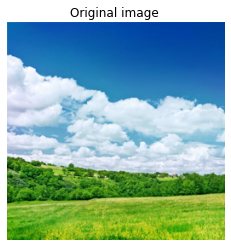

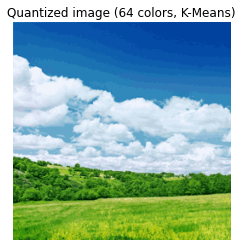

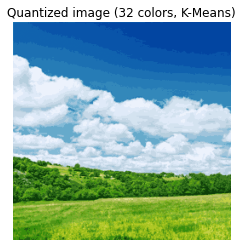

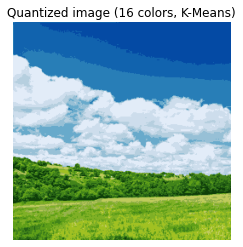

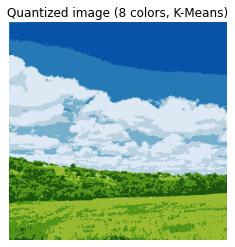

In [77]:
n_colors_list = (64, 32, 16, 8)

image = Image.open("img.jpg")
img_tenzor = np.asarray(image)/255
shape = img_tenzor.shape
print(f"image shape: {shape}")

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image ")
plt.imshow(img_tenzor)

def recreate_image(codebook, labels, width, height):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(width, height, -1)

def kmeans_quantization(n_colors, img_tenzor):
    shape = img_tenzor.shape
    image_array = np.reshape(img_tenzor, (shape[0] * shape[1], shape[2]))

    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    model = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    # Get labels for all points
    labels = model.predict(image_array)
    print(f"labels: {labels}")
    return labels, model.cluster_centers_
    

for i, n_colors in enumerate(n_colors_list):
    print(f'{n_colors} colors')
    labels, centers = kmeans_quantization(n_colors, img_tenzor)
    plt.figure(i+2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(centers, labels, shape[0], shape[1]))

### Task 2_2 EM-clustering

means actual:
 [42. 20.] 
 [70. 32.] 

covariances actual:
 [[42.  0.]
 [30. 33.]] 
 [[ 0. 10.]
 [10. 22.]] 



<ipython-input-78-f248a27ea18a>:13: RuntimeWarning: covariance is not positive-semidefinite.
  x1= np.random.multivariate_normal(mean1, cov1, (100, 100))
<ipython-input-78-f248a27ea18a>:14: RuntimeWarning: covariance is not positive-semidefinite.
  x2= np.random.multivariate_normal(mean2, cov2, (100, 100))


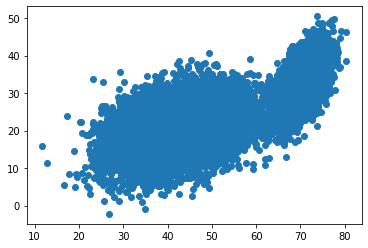

means predicted:
 [[70.01049689 31.98074386]
 [41.92794327 19.9976123 ]] 

covariances predicted:
 [[[ 6.83288513  7.41331124]
  [ 7.41331124 23.08242398]]

 [[50.39746335 12.70699663]
  [12.70699663 30.38331454]]] 

weights predicted:
 [0.5000612 0.4999388]


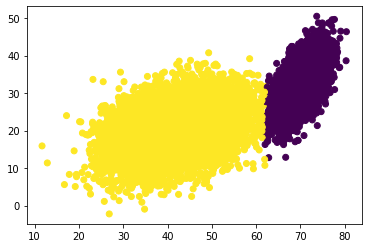

In [78]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


mean1 = np.array([42,20], dtype=np.float64)
mean2 = np.array([70,32], dtype=np.float64)
cov1 = np.array([[42, 0], [30, 33]], dtype=np.float64)
cov2 = np.array([[0, 10], [10, 22]], dtype=np.float64)
print(f'means actual:\n {mean1} \n {mean2} \n')
print(f'covariances actual:\n {cov1} \n {cov2} \n')
 
    
x1= np.random.multivariate_normal(mean1, cov1, (100, 100))
x2= np.random.multivariate_normal(mean2, cov2, (100, 100))
x1 = np.reshape(x1, (100 * 100, 2))
x2 = np.reshape(x2, (100 * 100, 2))
full = np.vstack([x1, x2])
full_shuffled = shuffle(full, random_state=42)
full_shuffled.shape

plt.scatter(full_shuffled[:,0], full_shuffled[:,1])
plt.show()

gaussian_model = GaussianMixture(n_components=2, random_state=0, tol=0.00001, covariance_type='full')
gaussian_model.fit(full_shuffled)
print(f'means predicted:\n {gaussian_model.means_} \n')
print(f'covariances predicted:\n {gaussian_model.covariances_} \n')
print(f'weights predicted:\n {gaussian_model.weights_}')

result = gaussian_model.predict(full_shuffled) 
plt.scatter(full_shuffled[:,0], full_shuffled[:,1], c=result)
plt.show()